#NPL analysis 2024

Nepal Premier League (NPL) is the premier domestic T20 cricket tournament in Nepal, bringing together top talents from across the country.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import geopandas as gpd
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Patch
import os
import plotly.graph_objects as go




In [5]:
matches = pd.read_csv("NPL matches.csv") 
balls = pd.read_csv("NPL_final.csv")
player = pd.read_csv("player.csv")

total_matches = len(matches)
print(total_matches)






32


<!-- The Nepal Premier League consists of 8 teams, each named after and representing one of the 7 provinces of Nepal. One province is represented by two teams, making the competition even more engaging while highlighting regional identity and pride -->

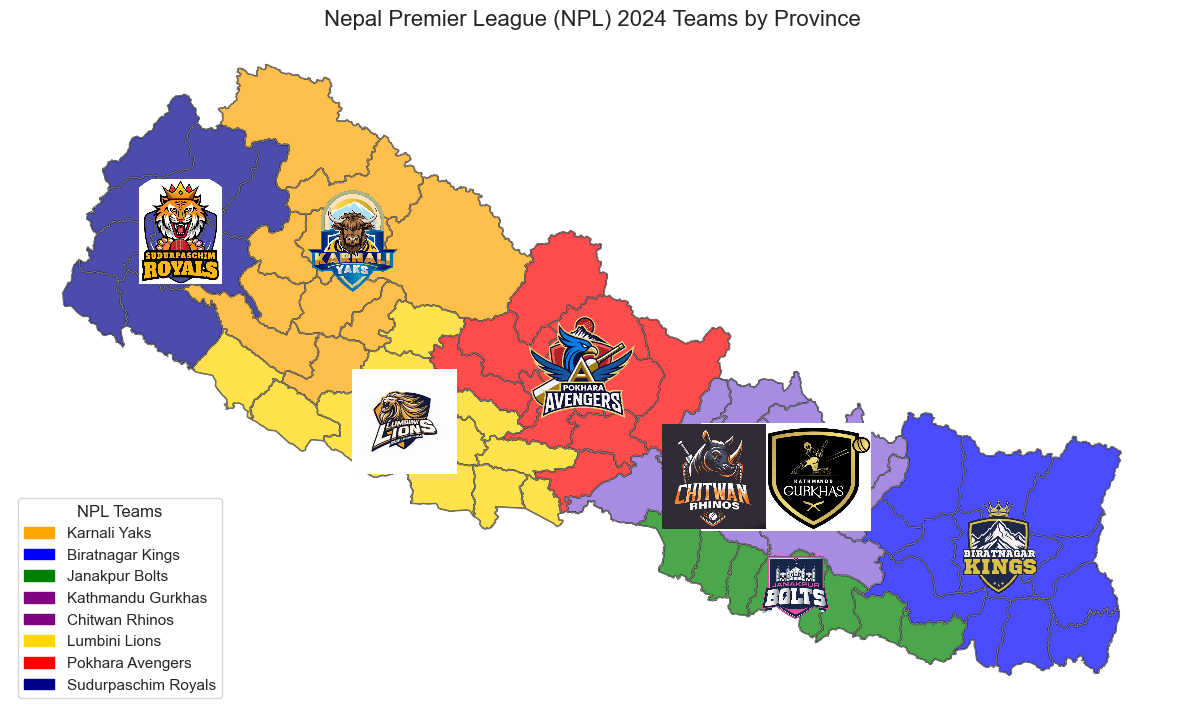

In [225]:



province_to_team = {
    'Karnali': 'Karnali Yaks',
    'Koshi': 'Biratnagar Kings',
    'Madhesh': 'Janakpur Bolts',
    'Bagmati': 'Kathmandu Gurkhas',  
    'Lumbini': 'Lumbini Lions',
    'Gandaki': 'Pokhara Avengers',
    'Sudurpashchim': 'Sudurpaschim Royals'
}

team_colors = {
    'Karnali Yaks': 'orange',
    'Biratnagar Kings': 'blue',
    'Janakpur Bolts': 'green',
    'Kathmandu Gurkhas': 'purple',
    'Chitwan Rhinos': 'purple',
    'Lumbini Lions': 'gold',
    'Pokhara Avengers': 'red',
    'Sudurpaschim Royals': 'darkblue'
}

team_logos = {
    'Kathmandu Gurkhas': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\kathmandu gurkhas.png",
    'Chitwan Rhinos': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\chitwan rhinos.png",
    'Biratnagar Kings': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\Biratnagar Kings.png",
    'Janakpur Bolts': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\Janakpur Bolts.png",
    'Karnali Yaks': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\karnali yaks.png",
    'Lumbini Lions': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\lumbini lions.png",
    'Pokhara Avengers': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\Pokhara Avengers.png",
    'Sudurpaschim Royals': r"C:\Users\ajayb\OneDrive\Desktop\logo.png\sudurpaschim royals.png"
}


gdf = gpd.read_file(r"C:\Users\ajayb\OneDrive\Desktop\nepal-districts-new.geojson")

province_code_map = {
    '1': 'Koshi',
    '2': 'Madhesh',
    '3': 'Bagmati',
    '4': 'Gandaki',
    '5': 'Lumbini',
    '6': 'Karnali',
    '7': 'Sudurpashchim'
}
gdf['province_name'] = gdf['ADM1_EN'].map(province_code_map)

fig, ax = plt.subplots(figsize=(12, 10))
gdf.boundary.plot(ax=ax, color='gray', linewidth=0.5)

logo_zoom = 0.15

for province, team in province_to_team.items():
    prov_gdf = gdf[gdf['province_name'] == province]
    if prov_gdf.empty:
        continue


    if province == 'Bagmati':
        prov_gdf.plot(ax=ax, color='mediumpurple', edgecolor='black', alpha=0.8)
    
        centroid = prov_gdf.geometry.union_all().centroid
        x, y = centroid.x, centroid.y
        
    
        bagmati_teams = ['Kathmandu Gurkhas', 'Chitwan Rhinos']
        offset_x = 0.2  
        

        for i, bagmati_team in enumerate(bagmati_teams):
            dx = (i - 0.5) * offset_x
            logo_path = team_logos.get(bagmati_team)
            
            try:
                if logo_path and os.path.exists(logo_path):
                    logo_img = Image.open(logo_path).convert("RGBA")  #
                    imagebox = OffsetImage(logo_img, zoom=logo_zoom)
                    ab = AnnotationBbox(imagebox, (x + dx, y), frameon=False)
                    ax.add_artist(ab)
                else:
                    plt.text(x + dx, y, bagmati_team, ha='center', va='center', 
                             fontsize=10, color='white', fontweight='bold')
            except Exception:
                plt.text(x + dx, y, bagmati_team, ha='center', va='center', 
                         fontsize=10, color='white', fontweight='bold')
    else:
        
        prov_gdf.plot(ax=ax, color=team_colors[team], edgecolor='black', alpha=0.7)
        centroid = prov_gdf.geometry.union_all().centroid
        
        logo_path = team_logos.get(team)
        try:
            if logo_path and os.path.exists(logo_path):
                logo_img = Image.open(logo_path).convert("RGBA")  
                imagebox = OffsetImage(logo_img, zoom=logo_zoom)
                ab = AnnotationBbox(imagebox, (centroid.x, centroid.y), frameon=False)
                ax.add_artist(ab)
            else:
                plt.text(centroid.x, centroid.y, team, ha='center', va='center', 
                         fontsize=10, color='white', fontweight='bold')
        except Exception:
            plt.text(centroid.x, centroid.y, team, ha='center', va='center', 
                     fontsize=10, color='white', fontweight='bold')

bagmati_teams = [ 'Chitwan Rhinos','Kathmandu Gurkhas']
offset_x = 0.8  

for i, team in enumerate(bagmati_teams):
    dx = (i - 0.5) * offset_x  
    logo_path = team_logos.get(team)
    if logo_path and os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        imagebox = OffsetImage(logo_img, zoom=logo_zoom)
        ab = AnnotationBbox(imagebox, (x + dx, y), frameon=False)
        ax.add_artist(ab)
    else:
        plt.text(x + dx, y, team, ha='center', va='center', fontsize=10, color='white', fontweight='bold')


plt.title('Nepal Premier League (NPL) 2024', fontsize=16)
plt.axis('off')


legend_handles = [Patch(color=color, label=team) for team, color in team_colors.items()]
plt.legend(handles=legend_handles, loc='lower left', title='NPL Teams')

plt.tight_layout()
plt.show()


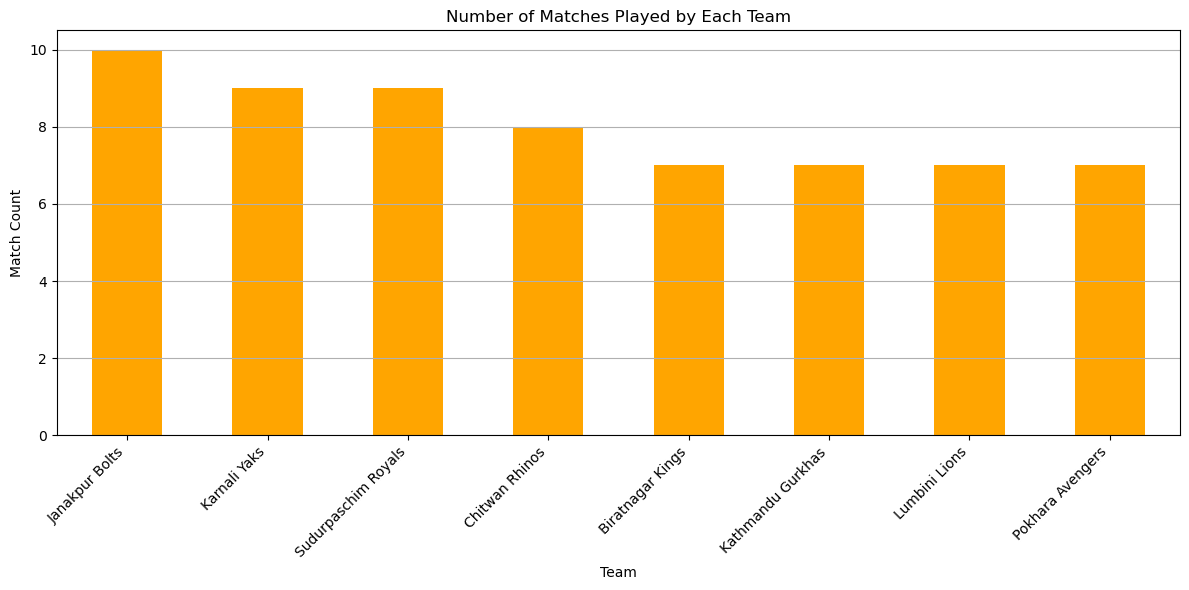

In [13]:
team_counts = matches['team_1'].value_counts() + matches['team_2'].value_counts()
team_counts = team_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
team_counts.plot(kind='bar', color='orange')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Match Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


<!-- The match statistics indicate that Janakpur Bolts played the highest number of games in the league with 10 matches. Karnali Yaks and Sudurpaschim Royals followed closely, each playing 9 matches. Chitwan Rhinos participated in 8 matches, while the remaining teams played only 7 matches each. This variation in the number of games played highlights the uneven match distribution across the teams. -->

In [24]:


matches_trimmed = matches[:-4].copy()

def overs_to_float(overs_str):
    if pd.isnull(overs_str):
        return 0.0
    parts = str(overs_str).split('.')
    overs = int(parts[0])
    balls = int(parts[1]) if len(parts) > 1 else 0
    return overs + balls / 6

matches_trimmed['team_1_overs_played'] = matches_trimmed['team_1_overs_played'].apply(overs_to_float)
matches_trimmed['team_2_overs_played'] = matches_trimmed['team_2_overs_played'].apply(overs_to_float)

teams = pd.concat([matches_trimmed['team_1'], matches_trimmed['team_2']]).unique()
team_stats_trimmed = []

for team in teams:
    team1_matches = matches_trimmed[matches_trimmed['team_1'] == team]
    team2_matches = matches_trimmed[matches_trimmed['team_2'] == team]

    runs_scored = team1_matches['team_1_runs'].sum() + team2_matches['team_2_runs'].sum()
    overs_faced = team1_matches['team_1_overs_played'].sum() + team2_matches['team_2_overs_played'].sum()
    runs_conceded = team1_matches['team_2_runs'].sum() + team2_matches['team_1_runs'].sum()
    overs_bowled = team1_matches['team_2_overs_played'].sum() + team2_matches['team_1_overs_played'].sum()

    nrr = ((runs_scored / overs_faced) - (runs_conceded / overs_bowled)) if overs_faced and overs_bowled else 0
    points = matches_trimmed['winner'].value_counts().get(team, 0) * 2

    team_stats_trimmed.append({
        'Team': team,
        'Points': points,
        'NRR': round(nrr, 3)
    })

points_nrr_trimmed = pd.DataFrame(team_stats_trimmed)
points_nrr_trimmed = points_nrr_trimmed.sort_values(by=['Points', 'NRR'], ascending=[False, False])
points_nrr_trimmed.reset_index(drop=True, inplace=True)

print(points_nrr_trimmed)


                  Team  Points    NRR
0  Sudurpaschim Royals      12  1.445
1       Janakpur Bolts      10  0.697
2       Chitwan Rhinos       8  0.096
3    Kathmandu Gurkhas       8 -0.107
4         Karnali Yaks       8 -0.372
5     Biratnagar Kings       4 -0.445
6     Pokhara Avengers       4 -0.776
7        Lumbini Lions       2 -0.502


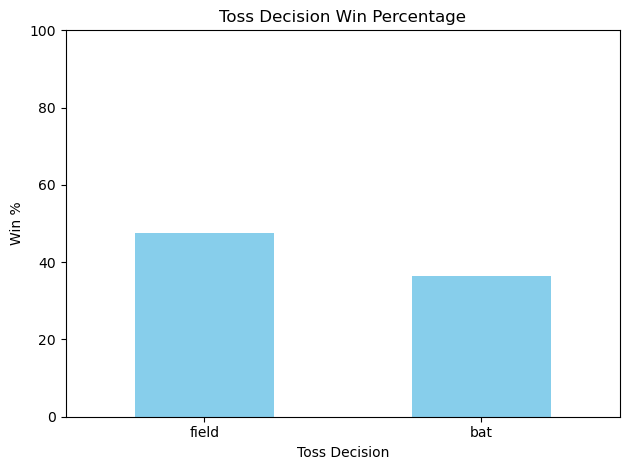

In [26]:
# 

toss_decision_counts = matches['toss_decision'].value_counts()
toss_win_counts = matches[matches['toss_winner'] == matches['winner']]['toss_decision'].value_counts()

toss_analysis = pd.DataFrame({
    'Total Tosses': toss_decision_counts,
    'Wins After Toss': toss_win_counts
})
toss_analysis['Win Percentage'] = (toss_analysis['Wins After Toss'] / toss_analysis['Total Tosses'] * 100).round(2)

toss_analysis['Win Percentage'].plot(kind='bar', color='skyblue')
plt.title('Toss Decision Win Percentage')
plt.ylabel('Win %')
plt.xlabel('Toss Decision')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<!-- The chart illustrates the win percentages of teams based on their toss decisions—choosing to bat or field after winning the toss. Teams that opted to bat had a lower win rate of around 36%, while those that chose to field achieved a higher success rate of approximately 48%. This suggests that fielding first may offer a competitive edge, potentially due to better early pitch conditions, the advantage of chasing a known target, or weather factors like dew affecting play. Overall, fielding after winning the toss appears to be a more effective strategy in recent Nepal Premier League matches. -->

<!-- In conclusion, a higher win percentage for fielding first suggests that, in this dataset, teams that win the toss and choose to bowl are more successful. -->

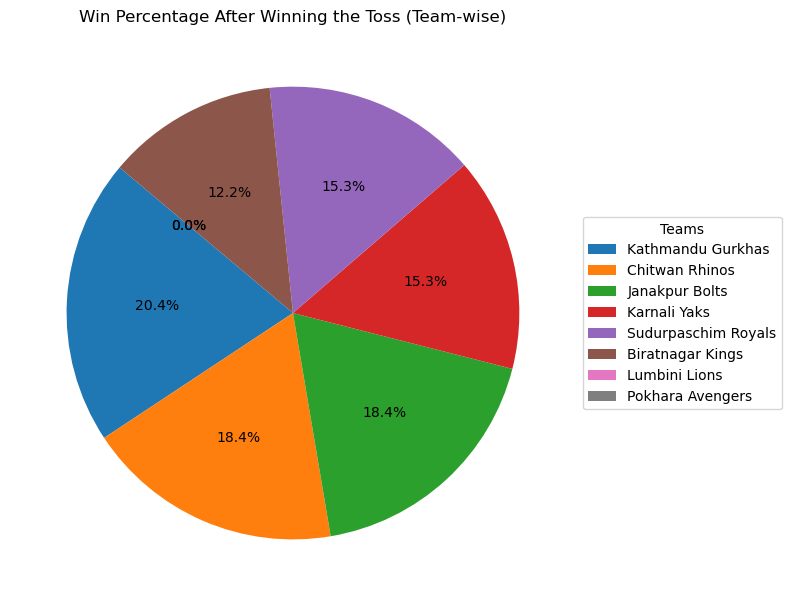

In [37]:
labels = team_stats['toss_winner']
sizes = team_stats['Win Percentage After Toss']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="black")
)

ax.legend(wedges, labels, title="Teams", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Win Percentage After Winning the Toss (Team-wise)')
plt.tight_layout()
plt.show()


<!-- The pie chart illustrates the win percentages of various teams after winning the toss, revealing that Kathmandu Gurkhas, Chitwan Rhinos, and Janakpur Bolts are the most effective at converting toss wins into match victories, with Kathmandu leading at 20.4%. In contrast, teams like Lumbini Lions and Pokhara Avengers show negligible or no success, indicating a failure to capitalize on the advantage of winning the toss. This suggests that while winning the toss can offer a strategic edge, actual match outcomes are heavily influenced by execution, preparation, and in-game decision-making rather than the toss alone. -->

<!-- Kathmandu Gurkhas achieved a win percentage of 20.4% after winning the toss.
Chitwan Rhinos and Janakpur Bolts both had a 18.4% win rate post-toss.
Lumbini Lions and Pokhara Avengers did not secure any wins after winning the toss. -->

<!-- Janakpur Bolts performed better when chasing (6 wins bowling first).
Kathmandu Gurkhas and Chitwan Rhinos showed more balance but leaned towards winning when batting first.
Pokhara Avengers only won when chasing, suggesting they are poor at defending totals.
Karnali Yaks and Sudurpaschim Royals also seem to prefer defending (bowling second). -->



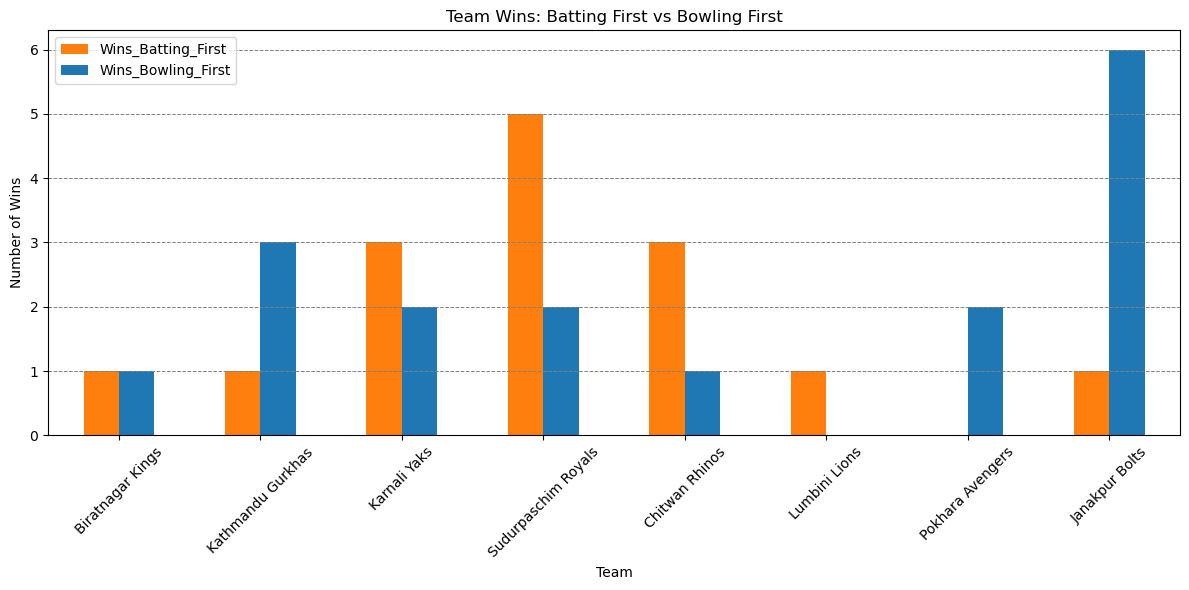

In [60]:


def get_batting_first(row):
    if row['toss_decision'].lower() == 'bat':
        return row['toss_winner']
    else:
        return row['team_1'] if row['toss_winner'] != row['team_1'] else row['team_2']

def get_batting_second(row):
    return row['team_1'] if row['batting_first'] == row['team_2'] else row['team_2']

matches['batting_first'] = matches.apply(get_batting_first, axis=1)
matches['batting_second'] = matches.apply(get_batting_second, axis=1)

bat_first_wins = matches[matches['winner'] == matches['batting_first']]['winner'].value_counts()
bowl_first_wins = matches[matches['winner'] == matches['batting_second']]['winner'].value_counts()

teams = pd.concat([matches['team_1'], matches['team_2']]).unique()

win_data = pd.DataFrame({
    'Team': teams,
    'Wins_Batting_First': [bat_first_wins.get(team, 0) for team in teams],
    'Wins_Bowling_First': [bowl_first_wins.get(team, 0) for team in teams]
})

ax = win_data.set_index('Team')[['Wins_Batting_First', 'Wins_Bowling_First']].plot(
    kind='bar', figsize=(12, 6), color=['#ff7f0e', '#1f77b4']
)

ax.set_title('Team Wins: Batting First vs Bowling First')
ax.set_ylabel('Number of Wins')
ax.set_xlabel('Team')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')

plt.tight_layout()
plt.show()


<!-- The chart highlights strategic strengths among teams, showing that Sudurpaschim Royals and Chitwan Rhinos are significantly better at winning matches when batting first, suggesting they perform well when setting targets. In contrast, Janakpur Bolts are dominant while bowling first, indicating strong chasing capabilities. Kathmandu Gurkhas and Pokhara Avengers also favor bowling first, whereas Biratnagar Kings show no clear preference. Lumbini Lions, with just one win, appear to be the least successful team overall. These trends suggest that team strategies and player strengths vary considerably based on match conditions and whether they bat or bowl first. -->

Top 5 highest single-innings across different matches:
   id                 team             opponent  runs
0   7     Biratnagar Kings        Lumbini Lions   193
1  12  Sudurpaschim Royals        Lumbini Lions   187
2  32       Janakpur Bolts  Sudurpaschim Royals   185
3   4  Sudurpaschim Royals     Biratnagar Kings   182
4  23     Biratnagar Kings       Chitwan Rhinos   181


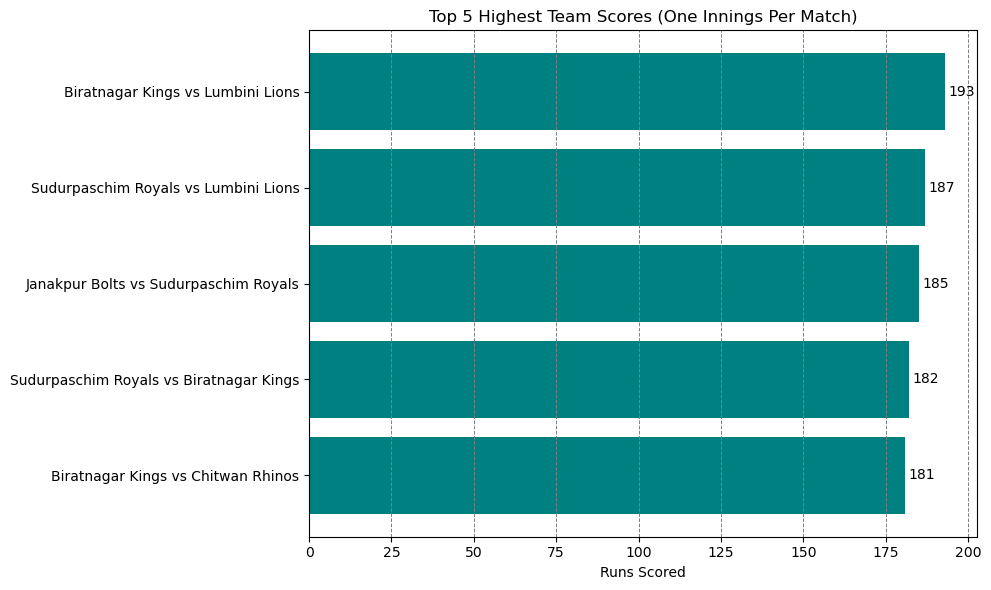

In [66]:

team1 = matches[['id', 'team_1', 'team_2', 'team_1_runs']].rename(
    columns={'id': 'id', 'team_1': 'team', 'team_2': 'opponent', 'team_1_runs': 'runs'})
team2 = matches[['id', 'team_2', 'team_1', 'team_2_runs']].rename(
    columns={'id': 'id', 'team_2': 'team', 'team_1': 'opponent', 'team_2_runs': 'runs'})


combined = pd.concat([team1, team2])
top_per_match = combined.sort_values('runs', ascending=False).drop_duplicates('id')


top5 = top_per_match.sort_values('runs', ascending=False).head(5).reset_index(drop=True)

print("Top 5 highest single-innings across different matches:")
print(top5[['id', 'team', 'opponent', 'runs']])


plt.figure(figsize=(10, 6))
bars = plt.barh(top5['team'] + " vs " + top5['opponent'], top5['runs'], color='teal')
plt.xlabel("Runs Scored")
plt.title("Top 5 Highest Team Scores (One Innings Per Match)")
plt.gca().invert_yaxis()
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color='gray')

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center')

plt.tight_layout()
plt.show()


<!-- The chart highlights the most dominant batting performances in the tournament, with Biratnagar Kings achieving the highest single-innings score of 193 runs against Lumbini Lions. Sudurpaschim Royals also feature prominently with two high scores, demonstrating their offensive consistency. Lumbini Lions, on the other hand, appear twice as the opposition, suggesting vulnerabilities in their bowling unit. Overall, matches involving Biratnagar Kings and Sudurpaschim Royals tend to produce explosive innings, positioning them as strong batting sides in the league. -->

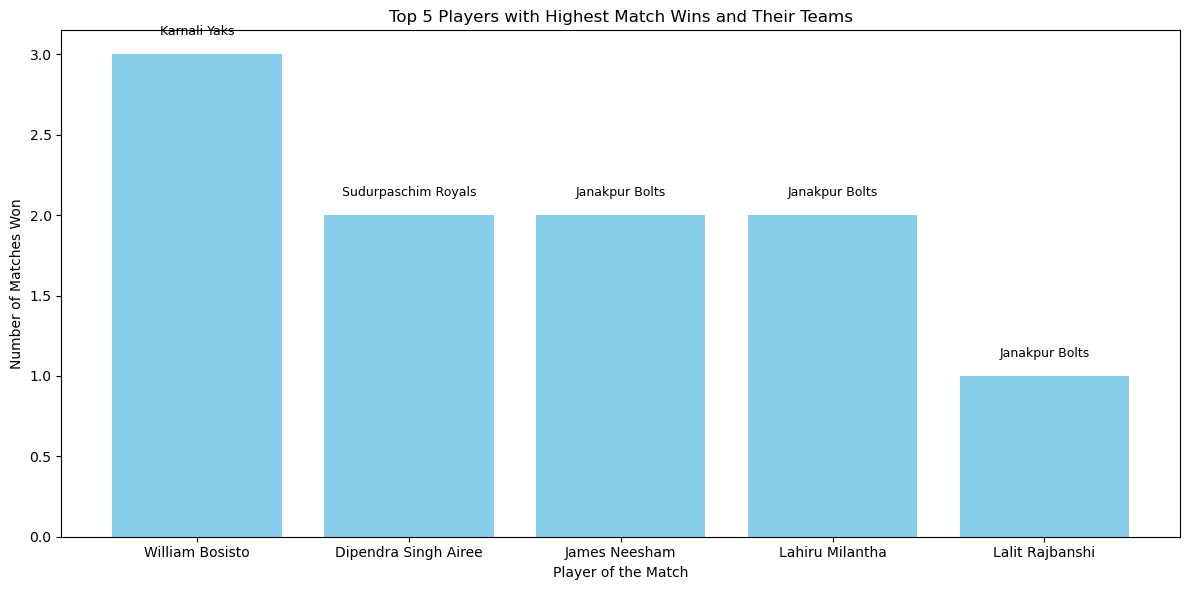

In [85]:

player_match_counts = matches['player_of_the_match'].value_counts()


player_teams = matches.groupby('player_of_the_match')['winner'].agg(lambda x: x.mode())


player_performance = pd.DataFrame({'matches_won': player_match_counts, 'team': player_teams})


player_performance_sorted = player_performance.sort_values(by='matches_won', ascending=False).head(5)

plt.figure(figsize=(12, 6))
bars = plt.bar(player_performance_sorted.index, player_performance_sorted['matches_won'], color='skyblue')
for bar, team in zip(bars, player_performance_sorted['team']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, team, ha='center', va='bottom', fontsize=9, rotation=0)
plt.title('Top 5 Players with Highest Match Wins and Their Teams')
plt.xlabel('Player of the Match')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<!-- This bar chart highlights the top 5 players with the highest match wins (as Player of the Match) along with their respective teams. William Bosisto from Karnali Yaks stands out with 3 match-winning performances, leading the chart. He is followed by Dipendra Singh Airee (Sudurpaschim Royals), James Neesham and Lahiru Milantha (both from Janakpur Bolts), each with 2 wins, showing consistency and impact in multiple games. Lalit Rajbanshi, also from Janakpur Bolts, contributes with 1 match-winning performance. Overall, the Janakpur Bolts dominate the list with three players, indicating a strong core of impactful performers contributing to their success. -->

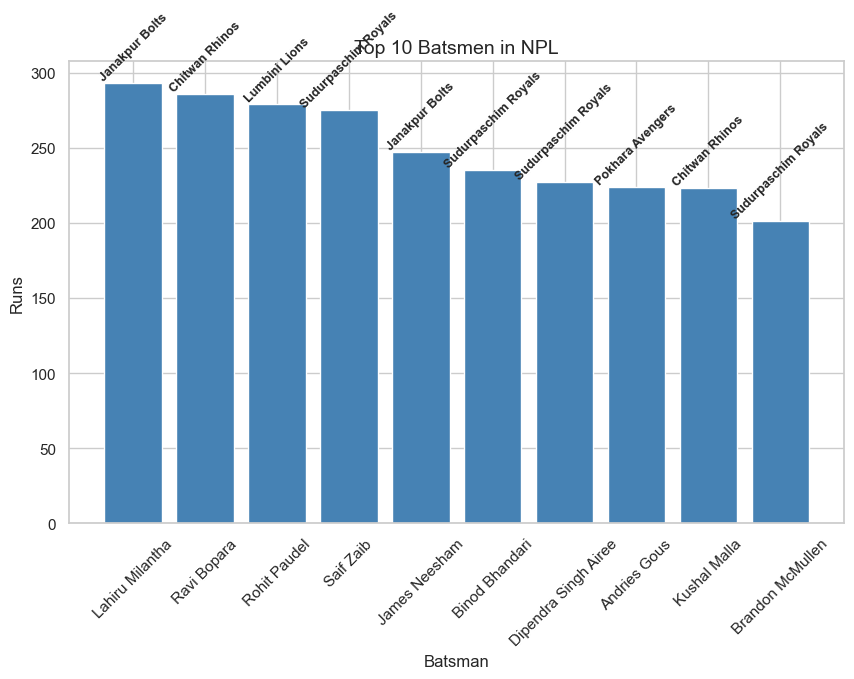

In [189]:

batsman_to_team = balls.groupby('batsman')['batting_team'].agg(lambda x: x.mode()[0]).to_dict()


runs = balls.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_batsmen = runs.head(10).reset_index()
top_batsmen.columns = ['Batsman', 'Runs']
top_batsmen['Team'] = top_batsmen['Batsman'].map(batsman_to_team)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_batsmen['Batsman'], top_batsmen['Runs'], color="steelblue")
for bar, team in zip(bars, top_batsmen['Team']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+2, team, ha='center', fontsize=9, fontweight='bold',rotation = 45)

plt.title('Top 10 Batsmen in NPL', fontsize=14)
plt.xlabel('Batsman')
plt.xticks(rotation=45)
plt.ylabel('Runs')
plt.show()

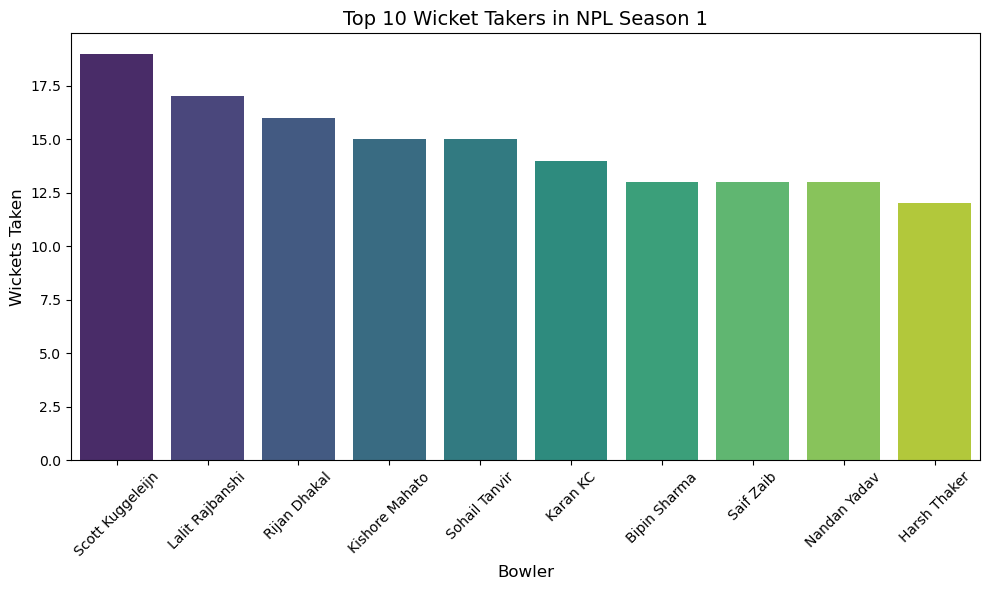

In [97]:


wicket_balls = balls[balls['player_dismissed'].notnull()]


wicket_balls = wicket_balls[wicket_balls['dismissal_kind'] != 'run out']

top_wicket_takers = wicket_balls['bowler'].value_counts().head(10).reset_index()
top_wicket_takers.columns = ['Bowler', 'Wickets']


plt.figure(figsize=(10, 6))
sns.barplot(data=top_wicket_takers, x='Bowler', y='Wickets', palette='viridis',hue='Bowler', dodge =False , legend = False)
plt.title('Top 10 Wicket Takers in NPL Season 1', fontsize=14)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Wickets Taken', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


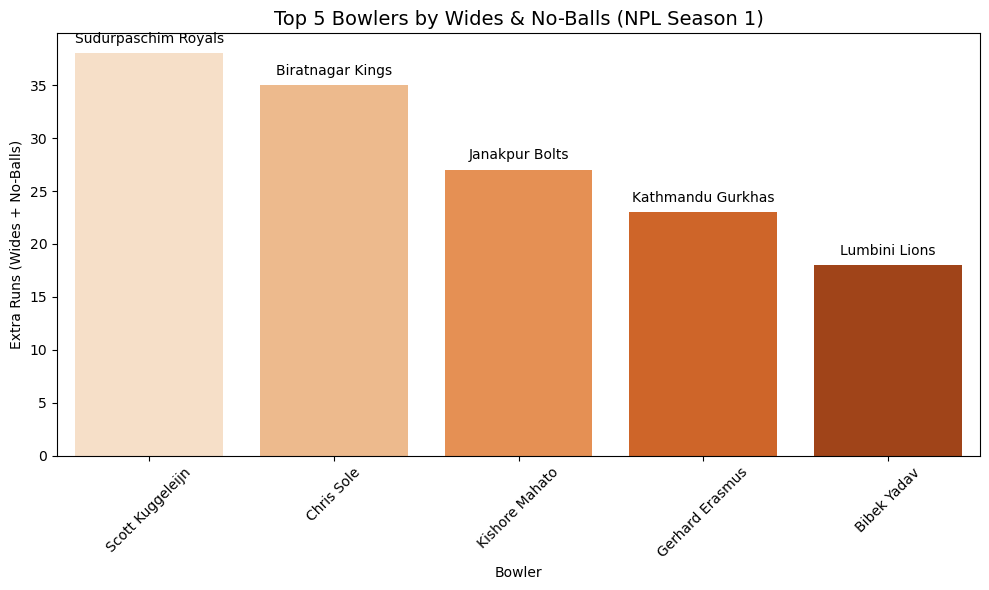

In [109]:



wide_noball = balls[(balls['wide_runs'] > 0) | (balls['noball_runs'] > 0)]

wide_noball_summary = wide_noball.groupby(['bowler', 'bowling_team'])[['wide_runs', 'noball_runs']].sum()
wide_noball_summary['Total'] = wide_noball_summary['wide_runs'] + wide_noball_summary['noball_runs']
wide_noball_summary = wide_noball_summary.sort_values('Total', ascending=False).reset_index()

top5_extras = wide_noball_summary.head(5)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=top5_extras,
    x='bowler',
    y='Total',
    hue='bowler',
    palette='Oranges',
    legend=False  
)


for index, row in top5_extras.iterrows():
    barplot.text(index, row['Total'] + 1, row['bowling_team'], ha='center', fontsize=10, color='black')

plt.title('Top 5 Bowlers by Wides & No-Balls (NPL Season 1)', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Extra Runs (Wides + No-Balls)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



These extras could include wides, no-balls,

In [126]:
print(nepal_districts.columns)



Index(['Shape_Leng', 'Shape_Area', 'DIST_EN', 'DIST_PCODE', 'DIST_REF',
       'DIST_ALT1E', 'DIST_ALT2E', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN',
       'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')


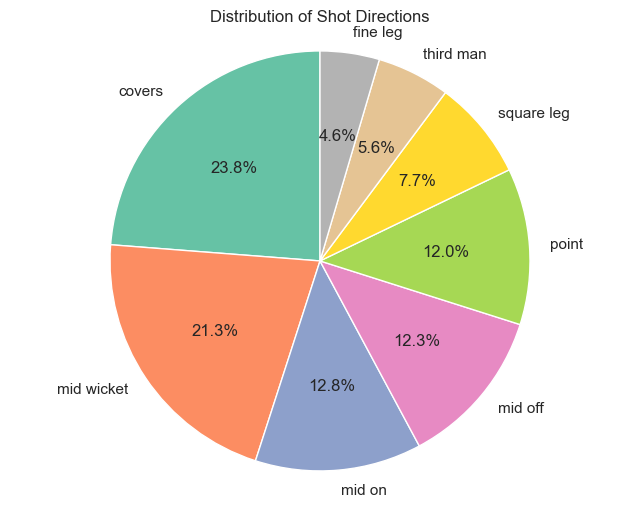

In [154]:
shot_direction_counts = balls['shot_direction'].value_counts()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

plt.pie(
    shot_direction_counts, 
    labels=shot_direction_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2", len(shot_direction_counts))
)

plt.title('Distribution of Shot Directions')
plt.axis('equal') 
plt.show()

<!-- The shot direction distribution reveals a strong batting tendency towards aggressive, front-foot play, with the majority of shots directed toward the covers and mid wicket regions. This indicates batters are primarily targeting scoring zones in front of the wicket, particularly on both the off and leg sides. The relatively lower frequency of shots behind the wicket, such as towards fine leg and third man, suggests that bowlers may be maintaining fuller lengths and straighter lines, discouraging deflections or late cuts. Overall, the data reflects a proactive batting approach focused on conventional and high-scoring regions. -->

<!-- shots played by players who scored over 150 runs in the overall tournament -->

<!-- This shows the preferred shot direction of each player. You can select a player's name from the dropdown menu below to view their favorite region for scoring runs. To keep the list manageable, only batsmen with more than 130 runs are included in the dropdown. -->

<!-- This visualization highlights each player's preferred shot direction. You can choose a player from the dropdown menu below to see which areas they favor for scoring runs. To keep the list concise, only batsmen who have scored more than 130 runs are available for selection. -->

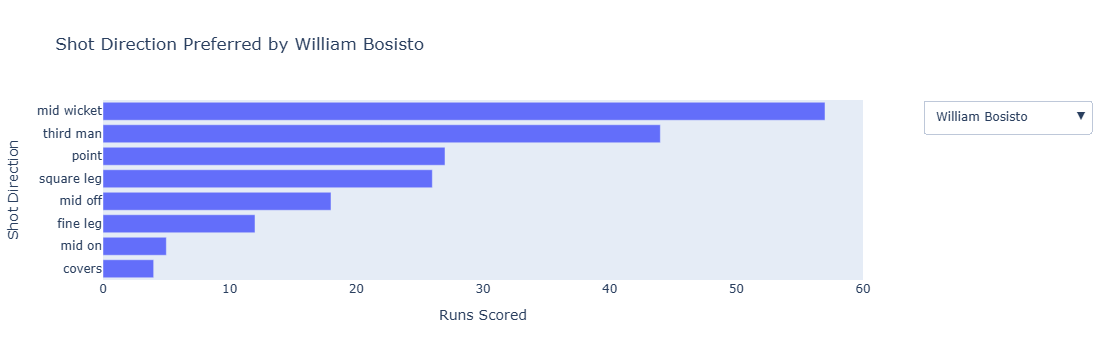

In [184]:


total_runs = balls.groupby('batsman')['batsman_runs'].sum().reset_index()
qualified_batsmen = total_runs[total_runs['batsman_runs'] > 130]['batsman'].tolist()

fig = go.Figure()

for i, batsman in enumerate(qualified_batsmen):
    filtered_data = balls[balls['batsman'] == batsman]
    direction = filtered_data.groupby('shot_direction')['batsman_runs'].sum().sort_values(ascending=True)

    fig.add_trace(go.Bar(
        x=direction.values,
        y=direction.index,
        orientation='h',
        name=batsman,
        visible=True if i == 0 else False
    ))

dropdown_buttons = [
    {
        'label': batsman,
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(qualified_batsmen))]},
            {'title': f'Shot Direction Preferred by {batsman}'}
        ]
    }
    for i, batsman in enumerate(qualified_batsmen)
]

fig.update_layout(
    updatemenus=[{
        'active': 0,
        'buttons': dropdown_buttons,
        'x': 1.3,
        'y': 1
    }],
    title=f'Shot Direction Preferred by {qualified_batsmen[0]}',
    xaxis_title='Runs Scored',
    yaxis_title='Shot Direction',
    showlegend=False
)

fig.show()


<!-- This graph illustrates the progression of runs throughout both innings of a cricket match, plotting overs on the X-axis and runs on the Y-axis. It marks each wicket that falls and also emphasizes a key partnership during the innings. -->

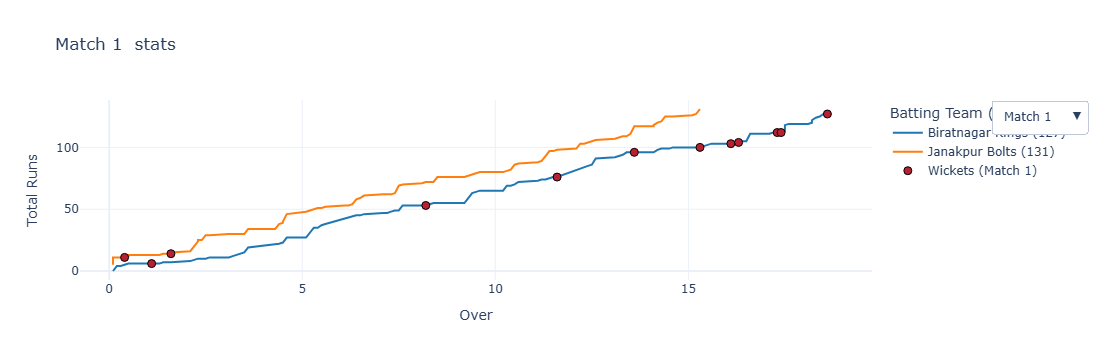

In [228]:
import pandas as pd
import plotly.graph_objects as go

match_ids = sorted(balls['match_id'].unique())[:33]  

fig = go.Figure()
buttons = []

for match_id in match_ids:
    match_data = balls[balls['match_id'] == match_id].sort_values('ball_over')
    match_data['runs'] = match_data.groupby('inning')['total_runs'].cumsum()

    
    inning_scores = match_data.groupby('inning')['runs'].max().to_dict()

    
    batting_teams = match_data[['inning', 'batting_team']].drop_duplicates()
    team_colors = {
        batting_teams.iloc[0]['batting_team']: "#1f77b4",
        batting_teams.iloc[1]['batting_team']: "#ff7f0e"
    }
    score_labels = {
        row['batting_team']: f"{row['batting_team']} ({inning_scores[row['inning']]})"
        for _, row in batting_teams.iterrows()
    }

    match_data['batting_team'] = match_data['inning'].map(dict(zip(batting_teams['inning'], batting_teams['batting_team'])))

    
    for team in match_data['batting_team'].unique():
        team_data = match_data[match_data['batting_team'] == team]
        fig.add_trace(go.Scatter(
            x=team_data['ball_over'],
            y=team_data['runs'],
            mode='lines',
            name=score_labels[team],
            line=dict(color=team_colors[team]),
            visible=(match_id == match_ids[0])
        ))

    
    wickets = match_data[match_data['ball_result'].isin(['W', '1W', '2W'])]
    fig.add_trace(go.Scatter(
        x=wickets['ball_over'],
        y=wickets['runs'],
        mode='markers',
        marker=dict(size=8, color='#B82132', symbol="0", line=dict(width=1, color='black')),
        name=f"Wickets (Match {match_id})",
        visible=(match_id == match_ids[0])
    ))


    n_traces = 3  
    total_traces = len(match_ids) * n_traces
    visibility = [False] * total_traces
    start = match_ids.index(match_id) * n_traces
    for i in range(n_traces):
        visibility[start + i] = True

    buttons.append(dict(
        label=f"Match {match_id}",
        method="update",
        args=[{"visible": visibility},
              {"title": f"Match {match_id} Run Progression"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.15,
        y=1,
        xanchor='left',
        yanchor='top'
    )],
    title=f"Match {match_ids[0]}  stats",
    xaxis_title="Over",
    yaxis_title="Total Runs",
    legend_title="Batting Team (Total Runs)",
    template="plotly_white",
    height=500
)

fig.show()


In [230]:
print(balls.columns.tolist())

['match_id', 'inning', 'batting_team', 'bowling_team', 'ball_over', 'ball_result', 'bowler', 'batsman', 'non_striker', 'shot_direction', 'player_dismissed', 'dismissal_kind', 'fielder', 'batsman_runs', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'extra_runs', 'total_runs']


In [235]:
print(player.columns.tolist())

['Name ', 'Role', 'Team', 'Nationality']


<!-- The players listed above represent the top 15 Nepali cricketers who participated and excelled in NPL Season 1. Their selection is based on both their designated roles and outstanding performances throughout the tournament.The top 15 Nepali players highlighted above were selected solely based on the number of runs they scored and wickets they took during NPL Season 1.-->

In [27]:
player.columns = player.columns.str.strip()
player['Name'] = player['Name'].str.strip()
player['Nationality'] = player['Nationality'].str.strip().str.lower()


def standardize_role(role):
    role = role.lower().replace('-', ' ').replace('_', ' ').strip()
    if 'top' in role and 'batsman' in role:
        return 'top order batsman'
    elif 'middle' in role and 'batsman' in role:
        return 'middle order batsman'
    elif 'wicketkeeper' in role:
        return 'wicketkeeper'
    elif 'spin' in role and 'all' in role:
        return 'spin all rounder'
    elif 'fast' in role and 'all' in role:
        return 'fast bowler all rounder'
    elif 'all rounder' in role or 'allrounder' in role:
        return 'all rounder'
    elif 'spin' in role:
        return 'spin bowler'
    elif 'fast' in role or 'medium' in role:
        return 'fast bowler'
    elif 'batsman' in role:
        return 'batsman'
    else:
        return role

player['Role'] = player['Role'].apply(standardize_role)


nepali_players = player[player['Nationality'] == 'nepal'].copy()


batting_stats = balls.groupby('batsman')['batsman_runs'].sum().reset_index()
batting_stats.columns = ['Name', 'Total_Runs']


wickets_df = balls[balls['player_dismissed'].notnull()]
bowling_stats = wickets_df.groupby('bowler')['player_dismissed'].count().reset_index()
bowling_stats.columns = ['Name', 'Wickets']


nepali_players = nepali_players.merge(batting_stats, on='Name', how='left')
nepali_players = nepali_players.merge(bowling_stats, on='Name', how='left')
nepali_players['Total_Runs'] = nepali_players['Total_Runs'].fillna(0)
nepali_players['Wickets'] = nepali_players['Wickets'].fillna(0)


def select_players(roles, count, sort_by):
    return nepali_players[nepali_players['Role'].isin(roles)].sort_values(
        by=sort_by, ascending=False
    ).head(count)


top_order = select_players(['top order batsman'], 3, 'Total_Runs')
middle_order = select_players(['middle order batsman'], 3, 'Total_Runs')
wicketkeepers = select_players(['wicketkeeper'], 2, 'Total_Runs')
spin_bowlers = select_players(['spin bowler'], 2, 'Wickets')
fast_bowlers = select_players(['fast bowler'], 2, 'Wickets')
allrounder_spin = select_players(
    ['spin all rounder',  'all rounder'], 2, 'Wickets')
allrounder_fast = select_players(
    [ 'fast bowler all rounder', 'all rounder'], 2, 'Wickets'
)


final_team = pd.concat([
    top_order,
    middle_order,
    wicketkeepers,
    spin_bowlers,
    fast_bowlers,
    allrounder_spin,
    allrounder_fast
    
]).drop_duplicates(subset=['Name']).reset_index(drop=True).head(15)

print(" Nepali Squad of T20 based on NPL Performance:\n")
print(final_team[['Name', 'Role', 'Team', ]])


🇳🇵 Nepali Squad of T20 based on NPL Performance:

                    Name                     Role                 Team
0             Lokesh Bam        top order batsman     Biratnagar KIngs
1           Ishan Pandey        top order batsman  Sudurpaschim Royals
2             Dev Khanal        top order batsman         Karnali Yaks
3           Sundeep Jora     middle order batsman        Lumbini lions
4            Bhim Sharki     middle order batsman    Kathmandu Gurkhas
5        Pratik Shrestha     middle order batsman    Kathmandu Gurkhas
6           Aasif Sheikh             wicketkeeper       Janakpur Bolts
7             Arjun Saud             wicketkeeper        Lumbini lions
8        Lalit Rajbanshi              spin bowler       Janakpur Bolts
9     Sandeep Lamichhane              spin bowler     Biratnagar KIngs
10          Rijan Dhakal              fast bowler       Chitwan Rhinos
11        Kishore Mahato              fast bowler       Janakpur Bolts
12  Dipendra Singh Airee   